In [58]:
import numpy as np
import matplotlib.pyplot as plt

# # This gives a list of the default colors, to use for plotting
# from matplotlib import colors as mcolors
# colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
# clrs=list(colors.keys())

# (a) make rate-current curve for leaky IF model

### First, simulate a single case and plot the voltage

In [40]:
# define parameters
C=1
gL=0.1
EL=-65
VR=-65
VT=-50

# simulation time
simtime=1000  # in msec

dt=0.1  # Note that the effective time constant, if consider the IF neuron as an RC circuit, is C/g_L. So make sure to choose dt to be much less than this
numsteps=np.round(simtime/dt).astype(int)
tvalues=np.arange(numsteps)*dt
allV=np.zeros(numsteps)
spiketimes=[]
allV[0]=VR
# note that the scale for input current is g_L*E_L, ~ 6 uA/cm^2, so set Iinput to be in this range.  Units are uA/cm^2
Iinput=1.7

for step in range(1,numsteps):
    if allV[step-1]>=VT:
        allV[step]=VR
        spiketimes.append(step*dt)
    else:
        allV[step]=allV[step-1]+dt/C*(-gL*(allV[step-1]-EL) + Iinput)

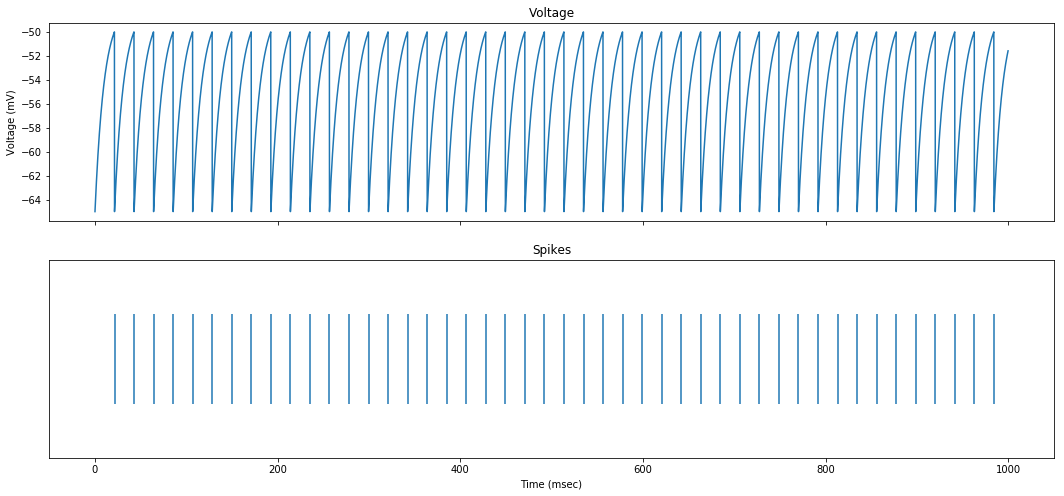

In [64]:
fig,ax=plt.subplots(2,1,sharex=True)
fig.set_size_inches((18,8))
ax[0].plot(tvalues,allV)
ax[0].set_title('Voltage')
ax[0].set_ylabel('Voltage (mV)')
ax[1].eventplot(spiketimes)
ax[1].set_title('Spikes')
ax[1].set_xlabel('Time (msec)')
ax[1].set_yticks([])
plt.show()

### Change the input current and calculate firing rate

In [73]:
# define parameters
C=1
gL=0.1
EL=-65
VR=-65
VT=-50

# simulation time
simtime=10000  # in msec
dt=0.1  # Note that the effective time constant, if consider the IF neuron as an RC circuit, is C/g_L. So make sure to choose dt to be much less than this
numsteps=np.round(simtime/dt).astype(int)
tvalues=np.arange(numsteps)*dt


# initialize
Iinputs=np.arange(1,3,0.1)
firingrates=np.zeros(len(Iinputs))

# loop!
for k in range(len(Iinputs)):
    Iinput=Iinputs[k]
    allV=np.zeros(numsteps)
    spiketimes=[]
    allV[0]=VR
    # note that the scale for input current is g_L*E_L, ~ 6 uA/cm^2, so set Iinput to be in this range.  Units are uA/cm^2
    for step in range(1,numsteps):
        if allV[step-1]>=VT:
            allV[step]=VR
            spiketimes.append(step*dt)
        else:
            allV[step]=allV[step-1]+dt/C*(-gL*(allV[step-1]-EL) + Iinput)
    # Calculate firing rate and save it
    firingrates[k]=len(spiketimes)/simtime*1000  # this will give firing rates in Hz


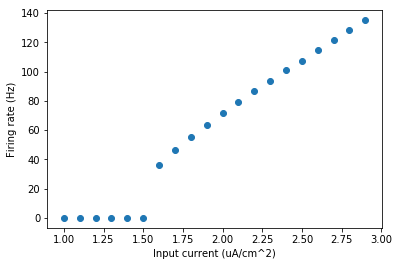

In [77]:
plt.scatter(Iinputs,firingrates)
plt.xlabel("Input current (uA/cm^2)")
plt.ylabel("Firing rate (Hz)")
plt.show()

### See how this depends on V_threshold

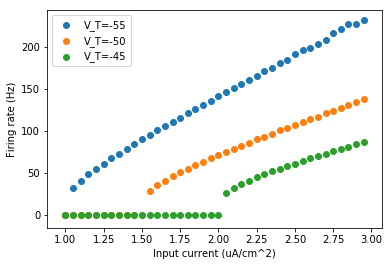

In [92]:
# define parameters
C=1
gL=0.1
EL=-65
VR=-65
VT=-50

# simulation time
simtime=1000  # in msec
dt=0.1  # Note that the effective time constant, if consider the IF neuron as an RC circuit, is C/g_L. So make sure to choose dt to be much less than this
numsteps=np.round(simtime/dt).astype(int)
tvalues=np.arange(numsteps)*dt


# initialize
Iinputs=np.arange(1,3,0.05)
firingrates=np.zeros(len(Iinputs))


# loop!
for VT in np.arange(-55,-40,5):
    firingrates=np.zeros(len(Iinputs))
    for k in range(len(Iinputs)):
        Iinput=Iinputs[k]
        allV=np.zeros(numsteps)
        spiketimes=[]
        allV[0]=VR
        # note that the scale for input current is g_L*E_L, ~ 6 uA/cm^2, so set Iinput to be in this range.  Units are uA/cm^2
        for step in range(1,numsteps):
            if allV[step-1]>=VT:
                allV[step]=VR
                spiketimes.append(step*dt)
            else:
                allV[step]=allV[step-1]+dt/C*(-gL*(allV[step-1]-EL) + Iinput)
        # Calculate firing rate and save it
        firingrates[k]=len(spiketimes)/simtime*1000  # this will give firing rates in Hz
    plt.scatter(Iinputs,firingrates,label='V_T='+str(VT))
plt.xlabel("Input current (uA/cm^2)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

### And how it depends on V_reset

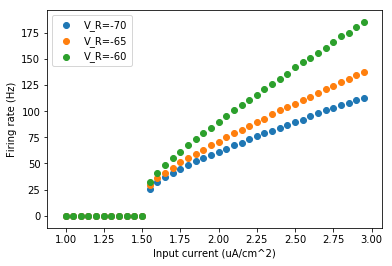

In [93]:
# define parameters
C=1
gL=0.1
EL=-65
VR=-65
VT=-50

# simulation time
simtime=1000  # in msec
dt=0.1  # Note that the effective time constant, if consider the IF neuron as an RC circuit, is C/g_L. So make sure to choose dt to be much less than this
numsteps=np.round(simtime/dt).astype(int)
tvalues=np.arange(numsteps)*dt


# initialize
Iinputs=np.arange(1,3,0.05)

# loop!
for VR in np.arange(-70,-55,5):
    firingrates=np.zeros(len(Iinputs))
    for k in range(len(Iinputs)):
        Iinput=Iinputs[k]
        allV=np.zeros(numsteps)
        spiketimes=[]
        allV[0]=VR
        # note that the scale for input current is g_L*E_L, ~ 6 uA/cm^2, so set Iinput to be in this range.  Units are uA/cm^2
        for step in range(1,numsteps):
            if allV[step-1]>=VT:
                allV[step]=VR
                spiketimes.append(step*dt)
            else:
                allV[step]=allV[step-1]+dt/C*(-gL*(allV[step-1]-EL) + Iinput)
        # Calculate firing rate and save it
        firingrates[k]=len(spiketimes)/simtime*1000  # this will give firing rates in Hz
    plt.scatter(Iinputs,firingrates,label='V_R='+str(VR))
plt.xlabel("Input current (uA/cm^2)")
plt.ylabel("Firing rate (Hz)")
plt.legend()
plt.show()

# (b) Excitatory synaptic input

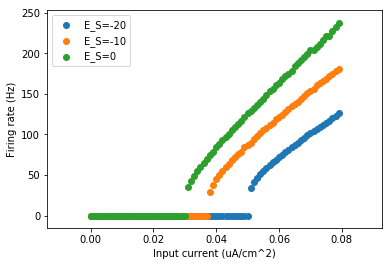

In [108]:
# define parameters
C=1
gL=0.1
EL=-65
VR=-65
VT=-50

ES=0

# simulation time
simtime=1000  # in msec
dt=0.1  # Note that the effective time constant, if consider the IF neuron as an RC circuit, is C/g_L. So make sure to choose dt to be much less than this
numsteps=np.round(simtime/dt).astype(int)
tvalues=np.arange(numsteps)*dt


# initialize
Iinputs=np.arange(1,3,0.05)

# loop!
gSvalues=np.arange(0.0,0.0,0.001)

for ES in [-20,-10,0]:

    firingrates=np.zeros(len(gSvalues))
    for k in range(len(gSvalues)):
        gS=gSvalues[k]
        allV=np.zeros(numsteps)
        spiketimes=[]
        allV[0]=VR
        # note that the scale for input current is g_L*E_L, ~ 6 uA/cm^2, so set Iinput to be in this range.  Units are uA/cm^2
        for step in range(1,numsteps):
            if allV[step-1]>=VT:
                allV[step]=VR
                spiketimes.append(step*dt)
            else:
                allV[step]=allV[step-1]+dt/C*(-gL*(allV[step-1]-EL) - gS*(allV[step-1]-ES))
        # Calculate firing rate and save it
        firingrates[k]=len(spiketimes)/simtime*1000  # this will give firing rates in Hz
    plt.scatter(gSvalues,firingrates,label='E_S='+str(ES))
plt.legend()
plt.xlabel("Input current (uA/cm^2)")
plt.ylabel("Firing rate (Hz)")
plt.show()